# Neural Networks

### A whirlwind tour of bio-inspired computing algorithms

#### Quentin Caudron

[Neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are currently in their second revival ( yes, their third coming ! ), and have taken the world by storm. They are typically large, highly complex models, built up of thousands of small "neurons", which act as nonlinear integration units. Today, they are the cutting edge in computer vision, machine translation, and speech recognition, prevalent in innumerable consumer devices.

### The inspiration

Artificial neural networks are, of course, inspired by the [biological networks of neurons](https://en.wikipedia.org/wiki/Biological_neural_network) found in animal brains. 

<img src="images/brainbow_axons.jpg" width="600px" />

Neurons are simple units. They can have a large number of inputs, and typically only one output. 

<img src="images/axon.jpg" width="700px" />

Neurons integrate their inputs and, if it's beyond a given threshold, the neuron "fires".

<img src="images/firing.gif" width="600px" />

Neurons are connected together in a feedforward manner, and form enormous networks.

<img src="images/brainbow.jpg" width="600px" />

Somehow, consciousness, and the ability to learn, **emerge** from these networks of simple units.

<img src="images/consciousness.jpg" width="700px" />

### Artificial neural networks

In a similar manner, articial neural networks are built of feedforward layers of simple neurons, each of which receives input from a number of sources and have one output value.

<img src="images/deep_net.jpg" width="600px" />

### So what's a neuron ?

In an artificial neural net, a neuron takes in multiple inputs, weights them individually, and sums them up. It then applies a nonlinear "activation" function to the sum, and the result is the output of this neuron.

<img src="images/ann_neuron.png" width="600px" />

### How do I set the weights ?

The **backpropagation algorithm** is a way to calculate the error made by each neuron as a function of its weights, and is largely responsible for the second coming of neural networks in AI in the 1980s. Today, all neural networks use backpropagation in tandem with some manner of gradient descent to tune the weights in a network.

### How many neurons and layers do I need ?

Therein lies the art and the magic.

## Implementation

Let's build a neural network that can recognise hand-written numbers. We'll use the famous MNIST dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [61]:
# Pull the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Unroll all vectors, cast as floats, and normalise
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 128
x_test /= 128
x_train -= 1
x_test -= 1

# Make dummy categoricals from class labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


def plot_data():
    
    plt.figure(figsize=(14, 6))
    
    for i in range(32):
        plt.subplot(4, 8, i+1)
        plt.title("Label : {}".format(np.where(y_train[i])[0][0]))
        plt.imshow(x_train[i].reshape(28, 28))
        plt.gca().get_xaxis().set_ticks([]); plt.gca().get_yaxis().set_ticks([])
        
    plt.tight_layout()
    
    
def plot_predictions():
    
    plt.figure(figsize=(14, 6))
    
    for i in range(32):
        plt.subplot(4, 8, i+1)
        
        plt.title("Predicted : {}\nTrue label : {}".format(
            np.argmax(model.predict(x_test[i].reshape(-1, 784))),
            np.where(y_test[i])[0][0]
        ))
        
        plt.imshow(x_test[i].reshape(28, 28))
        
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])

    plt.tight_layout()
    
    
def plot_incorrect():
    
    # Make predictions
    probabilities = model.predict(x_test)
    predictions = np.array([np.argmax(prob) for prob in probabilities])
    
    # Find those that are incorrect
    incorrect_idx = predictions != np.array([np.argmax(categorical) for categorical in y_test])
    
    # Randomly select 32 incorrect choices
    selected_idx = np.random.choice(np.where(incorrect_idx)[0], 32, replace=False)
    
    print("{} incorrectly predicted images out of 10000.".format(incorrect_idx.sum()))
    
    plt.figure(figsize=(14, 6))
    
    for i, idx in enumerate(selected_idx):
        plt.subplot(4, 8, i+1)
        
        plt.title("Predicted : {}\nTrue label : {}".format(
            np.argmax(model.predict(x_test[idx].reshape(-1, 784))),
            np.where(y_test[idx])[0][0]
        ))
        
        plt.imshow(x_test[idx].reshape(28, 28))
        
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])

    plt.tight_layout()

In [54]:
x = probabilities[incorrect_idx]#.argsort
np.max(x, 1).argsort()[:32]

array([218, 154, 113,   0, 228, 197, 229,  83, 212, 264, 193,  28, 155,
       254, 257, 208, 223, 234, 213,  61, 262, 243, 156, 272, 133,   3,
        43,  15,  98, 182,  80, 127,  59, 217, 245,  23, 231,  38,  41,
       271, 255, 221,  91,  14, 139,  39,  54,  75, 124, 171, 200, 205,
       206,  86,  26,  73, 266,  97,  34,  44, 144, 244, 186,   2,  88,
       268, 181,   5,  16, 118,   6, 192,  48, 198, 261,  65, 270, 111,
       150, 188,  77,  18,  72,  93, 249, 230,  24,  76, 140, 167, 106,
       240, 138,  33,  30, 202, 222, 116,  74,  55, 170, 194,  10,  94,
       239,   4, 246, 114, 237,  46, 103, 107,  35,  85, 199, 137, 216,
       224,  13, 258, 241, 146, 190,  25, 214, 259, 123, 105, 238,  69,
        45,  37,  17, 130,  50, 225, 265,  68,  71, 143, 209, 110, 115,
       163, 183, 236,  82, 120, 152, 185,  99, 128, 189, 135,  29, 263,
         7, 195, 119, 153,  36,  47,  57, 184,  32,  20, 117, 126, 168,
       142,  19,  60, 129, 166, 161, 101,  27,  84,  63, 132,  9

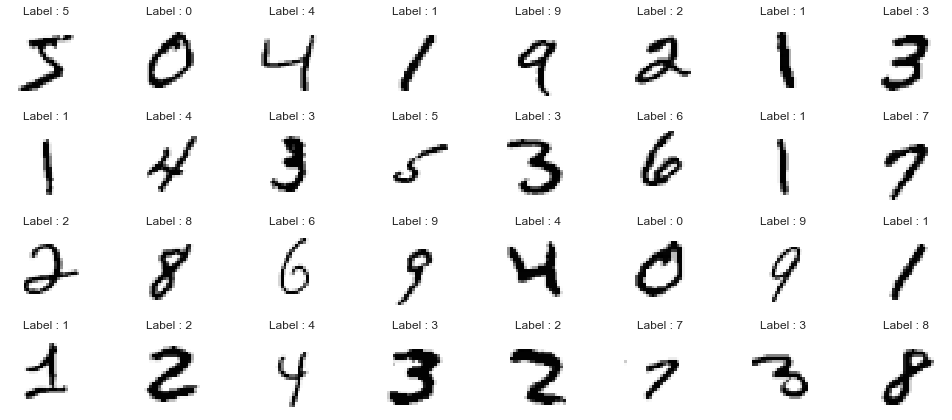

In [3]:
# What does the data look like ?
plot_data()

In [29]:
# Set up a simple three-layer neural network

model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

In [30]:
# Our neural network model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total para

Model accuracy before training : 0.1086


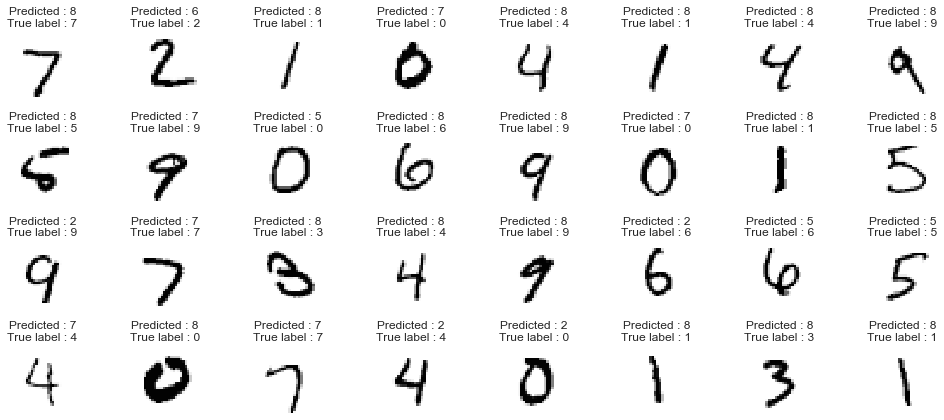

In [6]:
# What are the model's predictions before we train it,
# where the weights are just randomly initialised ?
plot_predictions()

print("Model accuracy before training : {}".format(model.evaluate(x_test, y_test, verbose=0)[1]))

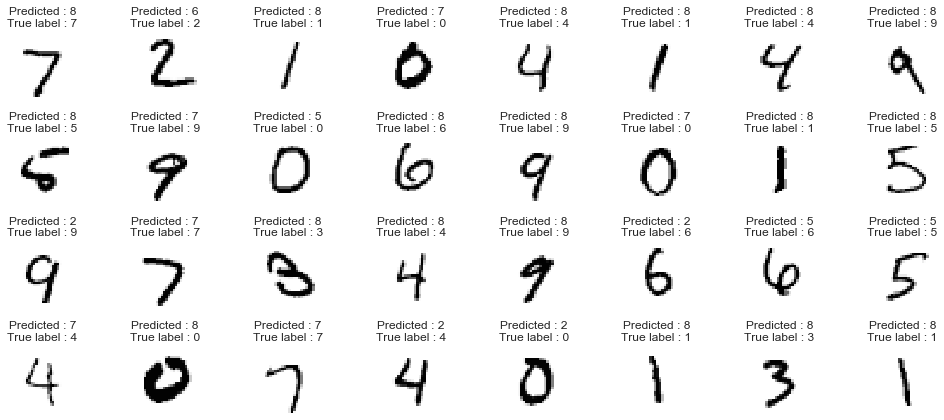

In [7]:
# What are the predictions from an untrained network,
# where weights are just randomly initialised ?
plot_predictions()

In [31]:
# Let's now train the network for five epochs
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

# Then, evaluate its performance
print("\nModel accuracy on unseen data : {}".format(model.evaluate(x_test, y_test, verbose=0)[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s - loss: 0.4866 - acc: 0.8496 - val_loss: 0.1864 - val_acc: 0.9443
Epoch 2/5
60000/60000 [==============================] - 15s - loss: 0.2214 - acc: 0.9343 - val_loss: 0.1829 - val_acc: 0.9434
Epoch 3/5
60000/60000 [==============================] - 18s - loss: 0.1841 - acc: 0.9465 - val_loss: 0.1078 - val_acc: 0.9695
Epoch 4/5
60000/60000 [==============================] - 12s - loss: 0.1685 - acc: 0.9541 - val_loss: 0.1085 - val_acc: 0.9680
Epoch 5/5
60000/60000 [==============================] - 11s - loss: 0.1639 - acc: 0.9552 - val_loss: 0.1000 - val_acc: 0.9727

Model accuracy on unseen data : 0.9727


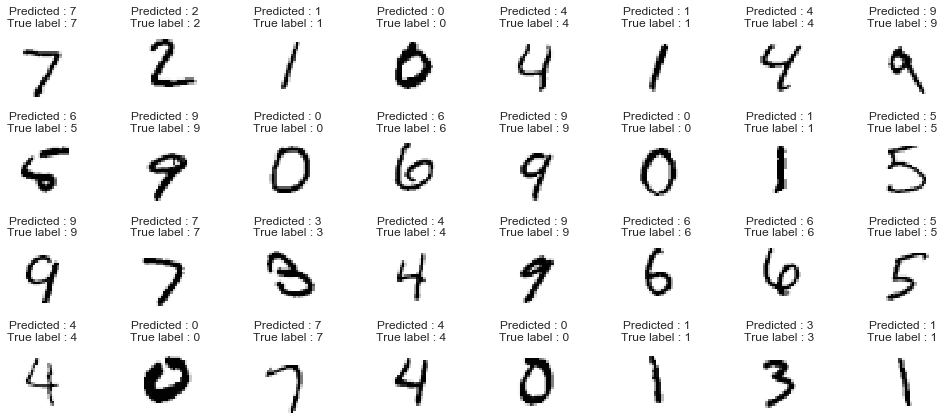

In [9]:
# How are the model's predictions now ?
plot_predictions()

273 incorrectly predicted images out of 10000.


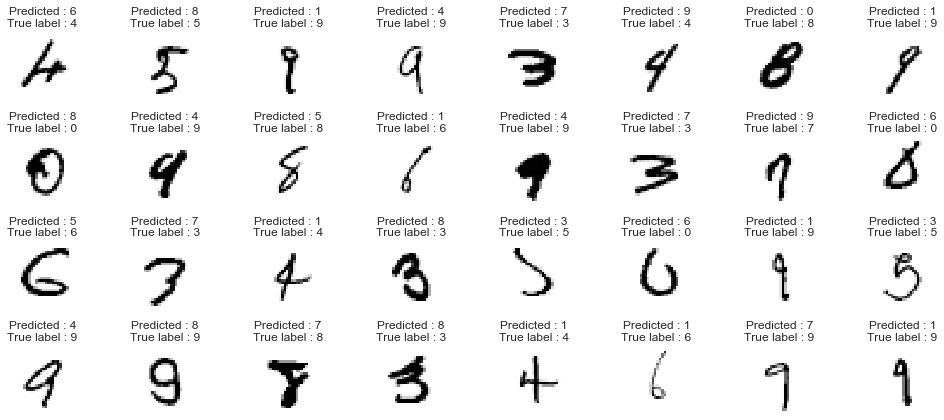

In [62]:
# What did it get wrong ?
plot_incorrect()

## Progress in artificial neural nets

With recent advances in computational power, we can now build bigger, deeper networks. It turns out that neural networks have a few things going for them :

- they're **[universal approximation machines](https://en.wikipedia.org/wiki/Universal_approximation_theorem)**
- they learn a **[representation](https://en.wikipedia.org/wiki/Feature_learning#Neural_networks)** of the data, and thus perform feature learning
- recent advances in **[network architectures](http://www.asimovinstitute.org/neural-network-zoo/)** make them wonderful tools for a variety of problems